<a href="https://colab.research.google.com/github/siri2511/Deep-Learning/blob/main/L2_Regularization_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


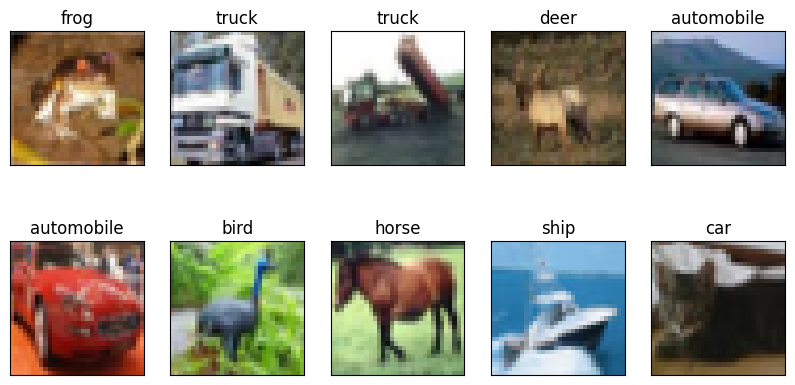

Training model without regularization


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 103ms/step - accuracy: 0.3763 - loss: 1.7173 - val_accuracy: 0.5351 - val_loss: 1.2956
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.5814 - loss: 1.1767 - val_accuracy: 0.6362 - val_loss: 1.0480
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.6592 - loss: 0.9768 - val_accuracy: 0.6386 - val_loss: 1.0279
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.7043 - loss: 0.8533 - val_accuracy: 0.6687 - val_loss: 0.9689
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.7463 - loss: 0.7348 - val_accuracy: 0.6845 - val_loss: 0.9318
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.7813 - loss: 0.6238 - val_accuracy: 0.7008 - val_loss: 0.9085
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.8196 - loss: 0.5207 - val_accuracy: 0.6890 - val_loss: 0.9450
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8689 - loss: 0.3968 -

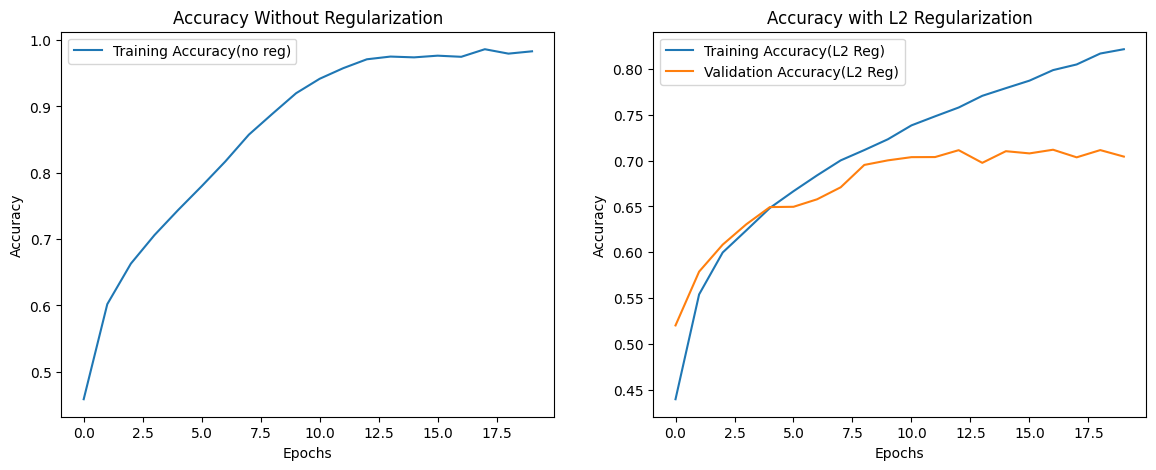

Model without regularization->Test Accuracy:0.6713,Test Loss:2.2400
Model with L2 regularization->Test Accuracy:0.6973,Test Loss:1.2641


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
#Load CIFAR-10 dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#define CIFAR 10 class names
class_names=['airplane','automobile','bird','car','deer','dog','frog','horse','ship','truck']
#function to display a few cifar10 images
def display_cifar_images(X,y,num_images=10):
  plt.figure(figsize=(10,5))
  for i in range(num_images):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    #show the corresponding class label for each image
    plt.title(class_names[y[i][0]])
  plt.show()
#display 10 images from the cifar 10 dataset
display_cifar_images(X_train,y_train)
#normalize the pixel values
X_train,X_test=X_train/255.0,X_test/255.0
#build a model
def build_model(regularization=None):
  model=Sequential([
      Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),kernel_regularizer=regularization),MaxPooling2D((2,2)),Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularization),MaxPooling2D((2,2)),Flatten(),Dense(512,activation='relu',kernel_regularizer=regularization),Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model
#train the model without regularization(overfitting expected)
print("Training model without regularization")
model_without_reg=build_model(regularization=None)
history_without_reg=model_without_reg.fit(X_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=1)
#train model with L2 regularisation
print("\nTraining model with L2 regularization")
model_with_reg=build_model(regularization=l2(0.001))
history_with_reg=model_with_reg.fit(X_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=1)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history_without_reg.history['accuracy'],label='Training Accuracy(no reg)')
plt.title('Accuracy Without Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_with_reg.history['accuracy'],label='Training Accuracy(L2 Reg)')
plt.plot(history_with_reg.history['val_accuracy'],label='Validation Accuracy(L2 Reg)')
plt.title('Accuracy with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#evaluate both models on the test data
test_loss_without_reg,test_acc_without_reg=model_without_reg.evaluate(X_test,y_test,verbose=0)
test_loss_with_reg,test_acc_with_reg=model_with_reg.evaluate(X_test,y_test,verbose=0)
print(f"Model without regularization->Test Accuracy:{test_acc_without_reg:.4f},Test Loss:{test_loss_without_reg:.4f}")
print(f"Model with L2 regularization->Test Accuracy:{test_acc_with_reg:.4f},Test Loss:{test_loss_with_reg:.4f}")
